# Fish Dataset
- The following data was obtained from : https://www.kaggle.com/datasets/aungpyaeap/fish-market
  


In [40]:
import numpy as np
import pandas as pd
from sklearn.linear_model import  LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import math
import seaborn as sns

- The Length is measured in cm
- The Weight is measured in g  

In [12]:
fish_dataset = pd.read_csv('Fish.csv')
fish_dataset.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [8]:
fish_dataset.head()
train_data, test_data = train_test_split(fish_dataset, test_size = 0.2)

A few plots to give us sense of the data and Train/Testing Data

[Text(0.5, 1.0, 'Heatmap')]

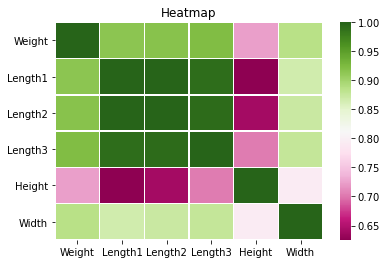

In [50]:
sns.heatmap(fish_dataset.corr(), linewidth = 0.5,cmap="PiYG").set(title = 'Heatmap')

Text(0.5, 1.0, 'Weight vs Length')

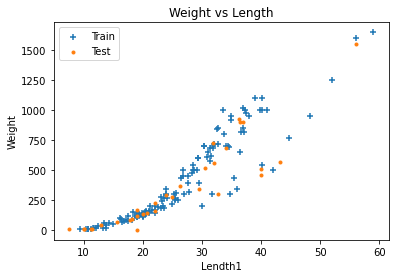

In [46]:

plt.scatter(train_data['Length1'],train_data['Weight'],marker = '+', label = 'Train')
plt.scatter(test_data['Length1'],test_data['Weight'],marker = '.', label = 'Test')
plt.legend()
plt.xlabel('Length1')
plt.ylabel('Weight')
plt.title('Weight vs Length')



Building the Model using Linear Regression with the Linear Algebra Library from Numpy

In [53]:

# Stating the features used to build the model for Linear Regression
features = ['Length1', 'Length2','Length3','Height','Width']
model = LinearRegression().fit(train_data[features],train_data['Weight'])
prediction = model.predict(test_data[features])
# Evaluation of the model 
test_mse = mean_squared_error(test_data['Weight'], prediction)
test_rsme = math.sqrt(test_mse)
print("The Test RMSE of all the features is : %f" % test_rsme)
print("The y - intercept is:")
print(model.intercept_)
print("The coefficients are:")
print(model.coef_)

The Test RMSE of all the features is : 153.221708
The y - intercept is:
-533.3199105394067
The coefficients are:
[ 74.14155826 -22.37826811 -23.93799522  27.85424893  26.90931544]


Plot Learning Curve

Text(0, 0.5, 'RMSE')

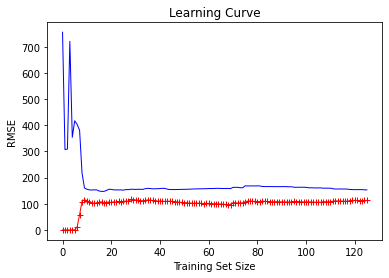

In [63]:
model =  LinearRegression()
train_errors = []
test_error = []
X_train = train_data[features]
y_train = train_data['Weight']
X_test = test_data[features]
y_test = test_data['Weight']
for m in range(1,len(train_data)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_test_predict = model.predict(X_test)
    train_errors.append(mean_squared_error(y_train[:m],y_train_predict))
    test_error.append(mean_squared_error(y_test,y_test_predict))
plt.plot(np.sqrt(train_errors), "r-+", linewidth = 1, label = "train")
plt.plot(np.sqrt(test_error), "b-", linewidth = 1, label = "test")
plt.title("Learning Curve")
plt.xlabel("Training Set Size")
plt.ylabel("RMSE")
    

In [57]:
len(train_data)

127